<a href="https://colab.research.google.com/github/nguyenmaivy/sgu25_NguyenHoangMaiVy_3122410490/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive # kết nối dữ liệu được đẩy lên drive trên mục colab notebooks
drive.mount('/content/drive/')

Mounted at /content/drive/


# Overview
- Diabetes dataset
  + Goal: Phân tích và dự đoán khả năng mắc bệnh tiểu đường dựa trên dữ liệu lâm sàng.
  + Input: 8 biến y tế & cá nhân
    * Pregnancies – Số lần mang thai
    * Glucose – Nồng độ glucose huyết tương sau 2 giờ trong test dung nạp glucose
    * BloodPressure – Huyết áp tâm trương (mm Hg)
    * SkinThickness – Độ dày nếp gấp da cánh tay sau (mm)
    * Insulin – Nồng độ insulin huyết thanh sau 2 giờ (mu U/ml)
    * BMI – Chỉ số khối cơ thể (kg/m²)
    * DiabetesPedigreeFunction – Chỉ số phả hệ tiểu đường (nguy cơ di truyền)
    * Age – Tuổi (năm)
  + Output: Biến nhị phân (0/1) cho tình trạng tiểu đường
    * ```0```: Không bị tiểu đường
    * ```1```: Bị tiểu đường






In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
# URL dataset gốc
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

url = '/content/drive/My Drive/Colab Notebooks/Lab3/pima-indians-diabetes/pima-indians-diabetes.csv'

In [3]:
df = pd.read_csv(url, header=None)
print(df.head(10))


    0    1   2   3    4     5      6   7  8
0   6  148  72  35    0  33.6  0.627  50  1
1   1   85  66  29    0  26.6  0.351  31  0
2   8  183  64   0    0  23.3  0.672  32  1
3   1   89  66  23   94  28.1  0.167  21  0
4   0  137  40  35  168  43.1  2.288  33  1
5   5  116  74   0    0  25.6  0.201  30  0
6   3   78  50  32   88  31.0  0.248  26  1
7  10  115   0   0    0  35.3  0.134  29  0
8   2  197  70  45  543  30.5  0.158  53  1
9   8  125  96   0    0   0.0  0.232  54  1


In [4]:
# Theo mô tả trên UCI, file csv này không có header, ta tự thêm tên cột
column_names = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]
# Đọc dataset
df = pd.read_csv(url, names=column_names)

In [5]:
# Tổng số instance, số thuộc tính
print("Number of Instances:", df.shape[0]) # Số lượng trường hợp trong tập csv
print("Number of Attributes:", df.shape[1]-1, "class") # Số lượng các thuộc tính

Number of Instances: 768
Number of Attributes: 8 class


In [6]:
# Kiểm tra missing value (ở dataset này một số giá trị được mã hóa bằng 0, cần xử lý sau) => giá trị bị thiếu
missing = (df == 0).sum()
print("\nMissing Attribute Values (encoded as 0):")
# display(missing)
print(missing)


Missing Attribute Values (encoded as 0):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [7]:

# Phân phối class
print("\nClass Distribution:")

class_dist = df['Outcome'].value_counts().reset_index()
class_dist.columns = ['Class Value', 'Number of instances']

display(class_dist)



Class Distribution:


,Class Value,Number of instances
0,0,500
1,1,268


In [8]:
# Thống kê trung bình và độ lệch chuẩn
print("\nBrief statistical analysis:")
stats = df.describe().T[['mean','std']].round(1)
display(stats)


Brief statistical analysis:


,mean,std
Pregnancies,3.8,3.4
Glucose,120.9,32.0
BloodPressure,69.1,19.4
SkinThickness,20.5,16.0
Insulin,79.8,115.2
BMI,32.0,7.9
DiabetesPedigreeFunction,0.5,0.3
Age,33.2,11.8
Outcome,0.3,0.5


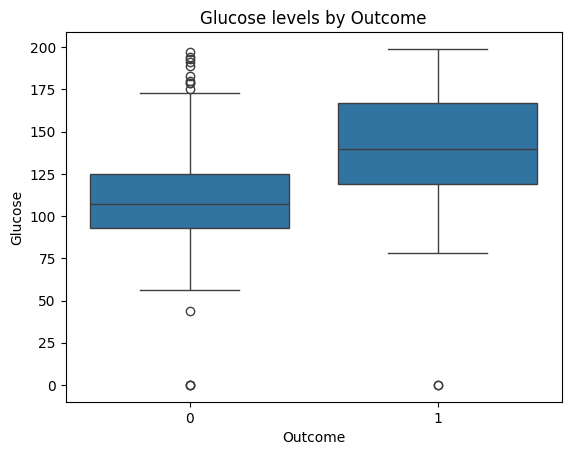

<Figure size 640x480 with 0 Axes>

In [9]:
# Biểu đồ phân phối biến Glucose theo nhóm Outcome
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose levels by Outcome')
plt.show()
plt.savefig('glucose.png')

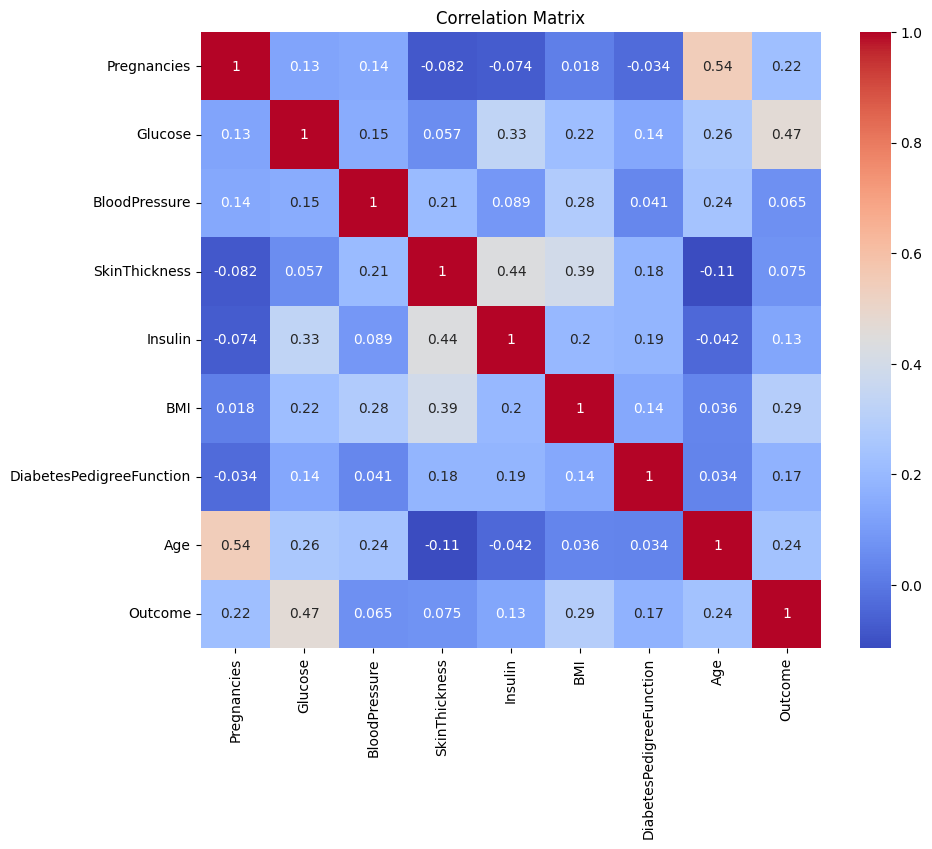

<Figure size 640x480 with 0 Axes>

In [10]:
# Biểu đồ ma trận tương quan
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
plt.savefig('correlation.png')

In [11]:
import os
os.listdir("/content")


['.config', 'glucose.png', 'drive', 'correlation.png', 'sample_data']